In [12]:
import pandas as pd 
import numpy as np 
#concat 合并相同的excle文件或者是给dataframe添加行或者列使用
df1 = pd.DataFrame(np.arange(6).reshape(3,2),columns=['forur','five'])
df2 = pd.DataFrame(np.arange(6).reshape(2,3),columns=['one','two','four'])
display(df1)
display(df2)
#重新对索引排序
pd.concat([df1,df2],axis=1,ignore_index=True)


,forur,five
0,0,1
1,2,3
2,4,5


,one,two,four
0,0,1,2
1,3,4,5


,0,1,2,3,4
0,0,1,0.0,1.0,2.0
1,2,3,3.0,4.0,5.0
2,4,5,NaN,NaN,NaN


In [17]:
#确立 使用位置索引,理解标签(自定义索引)索引
#csv文件 分成几个小文件
data = pd.read_csv('./ratings.csv',encoding='GBK')
data.shape
# #确定有多少个人
person = ['zs','lis','w5','zl','jason']
# #确定每个人分多少个
size = data.shape[0]/len(person)
size
# #如果不整除,进位的操作
if data.shape[0]%len(person)!=0:
    #int转变成整数
    size = int(np.ceil(size))
    print(size)
    


# #分配每个人的任务 拆分exlce 的 # [0:20167][20167:20167+20167]
#起始数据,结束数据,步长
for index,user_name in enumerate(person):
    100
    [0:100][0:100][99:200]
    #起始的切片 [0:10][20168:]
    begin = index *size
    #结束数据
    end = begin+size
    #切
    sub_data = data.iloc[begin:end]
    #保存位置的路径
    file_path = './folder/ratings_chinese_{}.csv'.format(user_name)
    #保存文件
    sub_data.to_csv(file_path)

20168


In [44]:
#合并 ,这些文件放在一个文件里面,给数据做标记
#尝试一下:mege
import os 

#找到需要文件的路径
csv_dir = './folder'
#安全判断
if os.path.exists(csv_dir):
    
    data_list = []
    #读取每一个文件的名字
    for csv_name in os.listdir(csv_dir):
        #csv_name文件的名字
#         print(csv_name)
        #拼接路径./folder/ratings_chinese_zl.csv,因为csv文件不和pandas2文件在同级别
        path=os.path.join(csv_dir,csv_name)
        
#         print(path)
        #读取文件需要完成的路径
        #将5个excle文件转换成pd
        data = pd.read_csv(path)
        #./folder/ratings_chinese.csv
        #zl w5 zs jason lis
        #zs lis w5 增加一列 找谁背锅 zs li w5(在一列) 每一行的数据
        #截取zs lis w5 zl
        print(csv_name)
        name = csv_name.replace('ratings_chinese_','').replace('.csv','')

# #         # 做标记
#         data['name']= name 
#         #data_list 存取的是所有的数据
#         data_list.append(data)
        
    print(data_list)
# #     #合并
#     #把里面的数据全部一个个拿出来
#     data_end = pd.concat(data_list)

    
#     data_end.to_csv('./all.csv')

.DS_Store
ratings_chinese_zl.csv
ratings_chinese_w5.csv
ratings_chinese_zs.csv
ratings_chinese_jason.csv
ratings_chinese_lis.csv
[]


In [43]:
#将两个表合成一个表
df_grade = pd.read_excel('./学生成绩表.xlsx')
# print(df_grade)
df_info = pd.read_excel('./学生信息表.xlsx')
# print(df_info)
#行合并好一点,1列2
#获取合并的列
df_info = df_info[['学号','姓名','性别']]
# # df_info
data = pd.merge(df_grade,df_info,left_on='学号',right_on='学号')


# data 

# #修改列的排序
#学号 姓名 性别 语文 数学英语
column_lsit = data.columns.tolist()

print(column_lsit)

#用自己的方式解决掉
for name in ['姓名','性别'][::-1]:
    #在列表一出
    column_lsit.remove(name)
    
#     print(column_lsit)
    #插入到学号后面
    #获取到学号的索引+1
    column_lsit.insert(column_lsit.index('学号')+1,name)
    
print(column_lsit)

# #修改列索引值就可以
data = data.reindex(columns=column_lsit)#修改索引值,索引值下面的数据会对应挪移
data

['学号', '语文', '数学', '英语', '姓名', '性别']
['学号', '姓名', '性别', '语文', '数学', '英语']


,学号,姓名,性别,语文,数学,英语
0,S001,Rita,女,60,90,65
1,S002,于霜,女,77,89,99
2,S003,小玉,女,100,83,67
3,S004,淑仪,女,74,67,87
4,S005,雨桐,女,98,60,94
5,S006,孝冉,女,80,71,89
6,S007,乾名,女,70,90,80
7,S008,炜然,女,65,73,67
8,S009,UZI,男,95,60,77
9,S010,Ming,男,90,65,91


In [36]:
import pandas as pd 
import numpy as np 
df1 = pd.DataFrame(np.arange(9).reshape(3, 3), index = ['bj', 'sh', 'gz'], columns=['a', 'b', 'c'])
display(df1)
# 修改 df1 的 index
print(df1.index) # 可以打印出print的值，同时也可以为其赋值
df1.columns = ['beijing', 'shanghai', 'guangzhou']
print(df1)



,a,b,c
bj,0,1,2
sh,3,4,5
gz,6,7,8


Index(['bj', 'sh', 'gz'], dtype='object')
    beijing  shanghai  guangzhou
bj        0         1          2
sh        3         4          5
gz        6         7          8


In [53]:
# 分组
import pandas as pd
import numpy as np
df=pd.DataFrame({
    'name':['BOSS','Lilei','Lilei','Han','BOSS','BOSS','Han','BOSS'],
    'Year':[2016,2016,2016,2016,2017,2017,2017,2017],
    'Salary':[999999,20000,25000,3000,9999999,999999,3500,999999],
    'Bonus':[100000,20000,20000,5000,200000,300000,3000,400000]
    })

print(df)

# 根据name这一列进行分组
group_by_name=df.groupby('name')
# print(group_by_name)

# 查看分组
# print(group_by_name.groups)
# 分组后的数量
# print(group_by_name.count())

# 产看分组的情况
for name,group in group_by_name:
#     print(name)# 组的名字
    print(group)# 组具体内容

    name  Year   Salary   Bonus
0   BOSS  2016   999999  100000
1  Lilei  2016    20000   20000
2  Lilei  2016    25000   20000
3    Han  2016     3000    5000
4   BOSS  2017  9999999  200000
5   BOSS  2017   999999  300000
6    Han  2017     3500    3000
7   BOSS  2017   999999  400000
   name  Year   Salary   Bonus
0  BOSS  2016   999999  100000
4  BOSS  2017  9999999  200000
5  BOSS  2017   999999  300000
7  BOSS  2017   999999  400000
  name  Year  Salary  Bonus
3  Han  2016    3000   5000
6  Han  2017    3500   3000
    name  Year  Salary  Bonus
1  Lilei  2016   20000  20000
2  Lilei  2016   25000  20000


In [60]:
# 按照多列进行分组
group_by_name_year=df.groupby(['name','Year'])

# for name,group in group_by_name_year:
#     print(name)# 组的名字
#     print(group)# 组具体内容

# 可以选择分组
# print(group_by_name_year.get_group(('BOSS',2016)))

# 将某列数据按数据值分成不同范围段进行分组（groupby）运算
df = pd.DataFrame({'Age': np.random.randint(20, 70, 100), 
                    'Sex': np.random.choice(['M', 'F'], 100), 
                    })
display(df)
age_groups = pd.cut(df['Age'], bins=[19,40,65,100])
# print(age_groups)
# print(df.groupby(age_groups).count())

# # 按‘Age’分组范围和性别（sex）进行制作交叉表
pd.crosstab(age_groups, df['Sex'])

,Age,Sex
0,52,F
1,65,F
2,63,F
3,45,F
4,46,F
...,...,...
95,37,F
96,68,F
97,46,M
98,65,M


Sex,F,M
Age,,
"(19, 40]",17,18
"(40, 65]",27,30
"(65, 100]",4,4


In [62]:
df1=pd.DataFrame({'Data1':np.random.randint(0,10,5),
                  'Data2':np.random.randint(10,20,5),
                  'key1':list('aabba'),
                  'key2':list('xyyxy')})
print(df1)
# 按key1分组，进行聚合计算
# 注意：当分组后进行数值计算时，不是数值类的列（即麻烦列）会被清除
print(df1.groupby('key1').sum())

   Data1  Data2 key1 key2
0      6     15    a    x
1      9     10    a    y
2      2     17    b    y
3      5     12    b    x
4      0     15    a    y
      Data1  Data2
key1              
a        15     40
b         7     29


In [66]:
# 只算data1
# print(df1['Data1'].groupby(df1['key1']).sum())
# print(df1.groupby('key1')['Data1'].sum())

# 使用agg()函数做聚合运算
# print(df1.groupby('key1').agg('sum'))

# 可以同时做多个聚合运算
display(df1.groupby('key1').agg(['sum','mean','std']))

Data1                Data2                     
       sum mean       std   sum       mean       std
key1                                                
a       15  5.0  4.582576    40  13.333333  2.886751
b        7  3.5  2.121320    29  14.500000  3.535534

In [67]:
# 可自定义函数，传入agg方法中 grouped.agg(func)
def peak_range(df):
    """
        返回数值范围
    """
    return df.max() - df.min()

print(df1.groupby('key1').agg(peak_range))

      Data1  Data2
key1              
a         9      5
b         3      5


In [68]:
# 同时应用多个聚合函数
# print(df1.groupby('key1').agg(['mean', 'std', 'count', peak_range])) # 默认列名为函数名
# print(df1.groupby('key1').agg(['mean', 'std', 'count', ('range', peak_range)])) # 通过元组提供新的列名

# 给每列作用不同的聚合函数
dict_mapping = {
    'Data1':['mean','max'],
    'Data2':'sum'
}
df1.groupby('key1').agg(dict_mapping)

Data1     Data2
      mean max   sum
key1                
a      5.0   9    40
b      3.5   5    29

In [72]:
# 拓展apply函数
# apply函数是pandas里面所有函数中自由度最高的函数
df1=pd.DataFrame({'sex':list('FFMFMMF'),'smoker':list('YNYYNYY'),'age':[21,30,17,37,40,18,26],'weight':[120,100,132,140,94,89,123]})
print(df1)
def bin_age(age):
    if age >=18:
        return 1
    else:
        return 0

# # 抽烟的年龄大于等18的
print(df1['age'].apply(bin_age))
df1['age'] = df1['age'].apply(bin_age)
print(df1)
#聚合就是分组完毕的数学计算
# # 取出抽烟和不抽烟的体重前二
def top(smoker,col,n=5):
    
    return smoker.sort_values(by=col)[-n:]

df1.groupby('smoker').apply(top,col='weight',n=2)

  sex smoker  age  weight
0   F      Y   21     120
1   F      N   30     100
2   M      Y   17     132
3   F      Y   37     140
4   M      N   40      94
5   M      Y   18      89
6   F      Y   26     123
0    1
1    1
2    0
3    1
4    1
5    1
6    1
Name: age, dtype: int64
  sex smoker  age  weight
0   F      Y    1     120
1   F      N    1     100
2   M      Y    0     132
3   F      Y    1     140
4   M      N    1      94
5   M      Y    1      89
6   F      Y    1     123


sex smoker  age  weight
smoker                          
N      4   M      N    1      94
       1   F      N    1     100
Y      2   M      Y    0     132
       3   F      Y    1     140

director_name
Ekachai Uekrongtham    1.620000e+02
Frank Whaley           7.030000e+02
Ricki Stern            1.111000e+03
Alex Craig Mann        1.332000e+03
Paul Bunnell           2.436000e+03
                           ...     
Sam Raimi              2.049549e+09
Tim Burton             2.071275e+09
Michael Bay            2.231243e+09
Peter Jackson          2.289968e+09
Steven Spielberg       4.114233e+09
Name: gross, Length: 1659, dtype: float64
[  1   1   1   1   1   1   2   1   2   1   1   1   1   2   2   1   1   1
   1   2   3   5   5   1   1   2   3   4   3   2   5   7   3   2   7   9
   6  14  17  16  13  23  15  25  30  30  33  27  30  33  44  51  66  93
 101 115 157 159 179 190 145 181 182 189 152 182 182 168 168 158 163 145
 128  59]


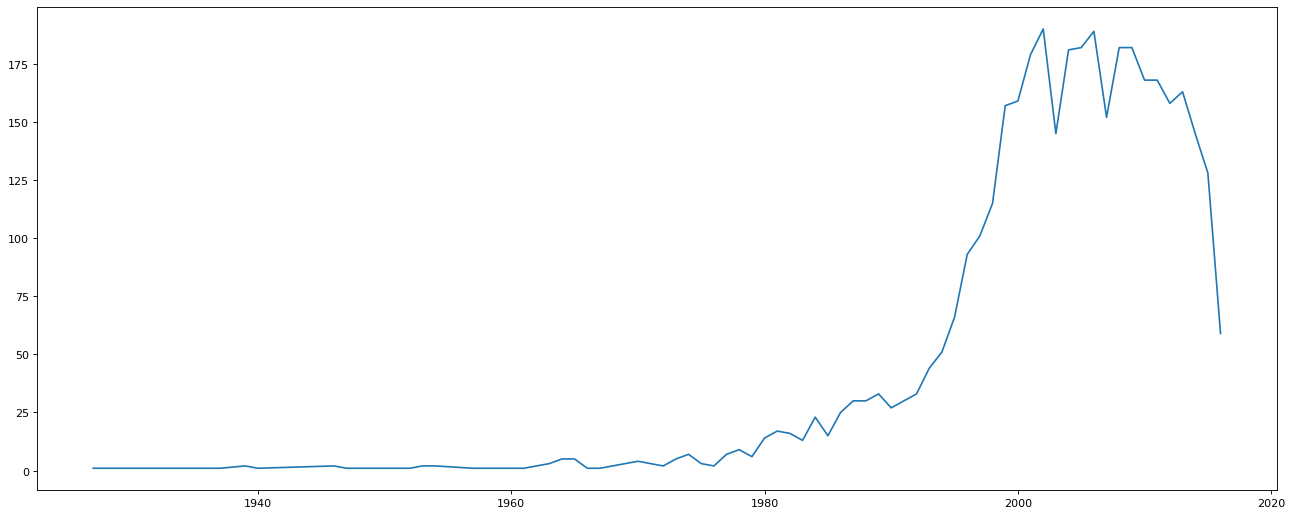

In [83]:
# 读取数据
data = pd.read_csv('movie_metadata.csv')
# print('数据的形状：', data.shape)
# display(data.head())

# # 2、处理缺失值
data = data.dropna(how='any')
# display(data.head())

# # 查看票房收入统计
# # 导演vs票房总收入
group_director = data.groupby(by='director_name')['gross'].sum()
# group_director
# # ascending升降序排列，True升序
result = group_director.sort_values()
print(result)


# # 电影产量年份趋势(每一年电影个数)
from matplotlib import pyplot as plt
import random
from matplotlib import font_manager
movie_years = data.groupby('title_year')['movie_title']



# print(movie_years.count().index.tolist())
print(movie_years.count().values)


x = movie_years.count().index.tolist()
y = movie_years.count().values
plt.figure(figsize=(20,8),dpi=80)
plt.plot(x,y)
plt.show()

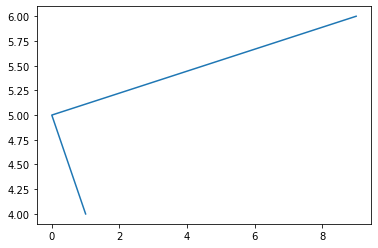

In [84]:
# 导入模块
import matplotlib.pyplot as plt
# 在jupyter中执行的时候显示图片
%matplotlib inline  
# 传入x和y, 通过plot画图
plt.plot([1, 0, 9], [4, 5, 6])
# 在执行程序的时候展示图形
plt.show()